# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 3</font>

***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss

from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import DescrStatsW

import seaborn as sns

In [2]:
dados = pd.read_csv('dados.csv')

# <font color=green>2 TESTES DE HIPÓTESES</font>
***

Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

## <font color=green>2.1 Teste de normalidade</font>
***


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

**Teste D'Agostino e Pearson** (Ideal para amostras grandes)<br>

- *scipy.stats.**normaltest***

**Teste de Shapiro-Wilk** (ideal para amostras pequenas)<br>

- *scipy.stats.**shapiro***


####  **hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.**

### Definindo a significância do teste ($\alpha$)

In [3]:
significancia = 0.05

### Testando a variável Renda

In [4]:
rendas = pd.DataFrame(dados.Renda.reset_index(drop = True))

In [5]:
rendas

,Renda
0,800
1,1150
2,880
3,3500
4,150
...,...
76835,812
76836,1500
76837,1300
76838,1500


Text(0, 0.5, 'Frequência')

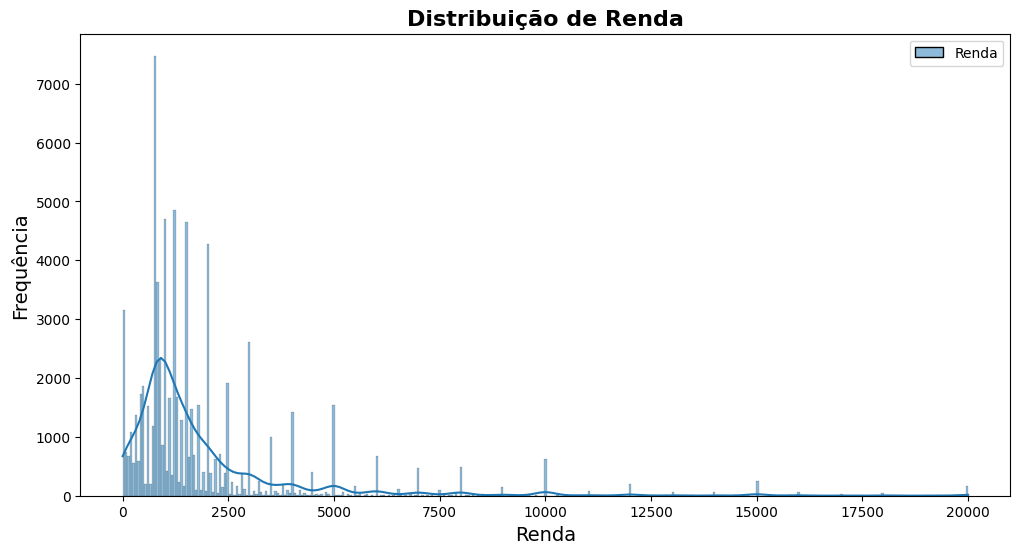

In [6]:
ax = sns.histplot(rendas.query('Renda <= 20000'), kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Renda', fontsize=16, fontweight='bold')
ax.set_xlabel('Renda', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)

### <font color='red'> Critério do valor </font> $p$

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [7]:
z, p_value = ss.normaltest(rendas.query('Renda <= 20000').Renda)
print('z =  {}' .format(z.round(2)))
print('p-value = %f' %p_value)

z =  60077.21
p-value = 0.000000


In [8]:
if p_value < significancia:
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


### Testando a variável Altura

In [9]:
alturas = pd.DataFrame(dados.Altura.reset_index(drop = True))
alturas

,Altura
0,1.603808
1,1.739790
2,1.760444
3,1.783158
4,1.690631
...,...
76835,1.687030
76836,1.792934
76837,1.830587
76838,1.726344


Text(0.5, 0, 'Altura')

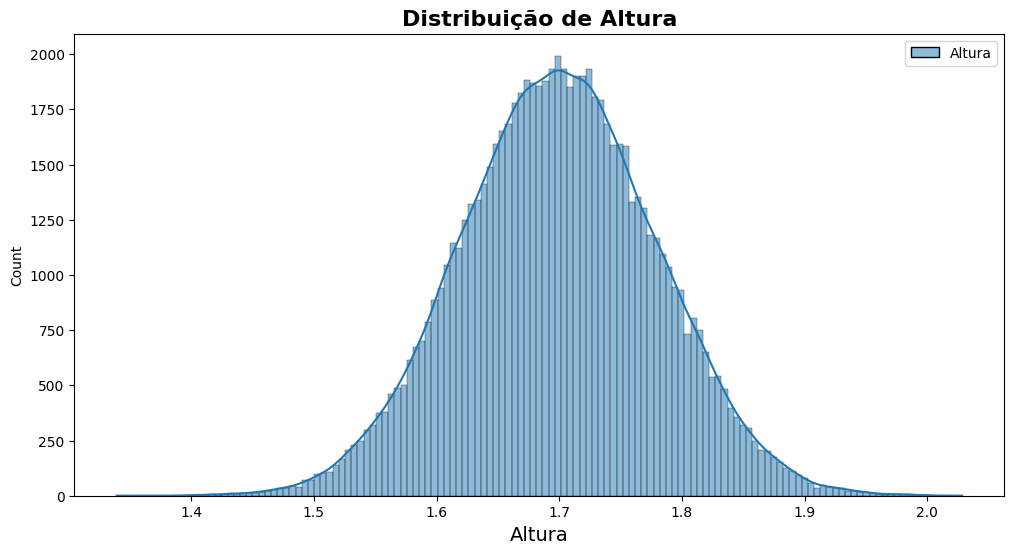

In [10]:
ax = sns.histplot(alturas, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Altura', fontsize=16, fontweight='bold')
ax.set_xlabel('Altura', fontsize=14)

In [11]:
z_stat, p_value = ss.normaltest(alturas)
print('z =  {}' .format(z_stat.round(2)))
print('p-value = %f' %p_value)

z =  [0.2]
p-value = 0.904959


C:\Users\adans\AppData\Local\Temp\ipykernel_24572\3626851843.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('p-value = %f' %p_value)


### <font color='red'>Critério do valor </font>$p$

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [12]:
if p_value <= significancia:
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Aceitar H0


## <font color=green>2.2 Etapas Básicas de um Teste</font>
***

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$;

> ### <font color='red'>Pontos importantes</font>
> - De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


### **Passo 2** - escolha da distribuição amostral adequada;

> ### <font color='red'>Pontos importantes</font>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### <font color='red'>Pontos importantes</font>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> ![Níveis de Confiança e significância](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png)
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> ![Áreas de Aceitação e Rejeição](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### <font color='red'>Pontos importantes</font>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)


### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### <font color='red'>Pontos importantes</font>
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira.
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

---

# <font color=green>3 TESTES PARAMÉTRICOS</font>
***

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

## <font color=green>3.1 Teste Bicaudal</font>
***

## <font color='red'>Problema</font>

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

---

In [121]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [122]:
amostra = pd.DataFrame(amostra)

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

---

### Dados do problema

In [123]:
media_amostral = amostra[0].mean()
significancia = 0.05
confianca = 1 - significancia
n = 50
desvio_padrao_amostral = amostra[0].std()

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu = 500$

### $H_1: \mu \neq 500$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [124]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

### Obtendo $z_{\alpha/2}$

In [125]:
z_alpha_2 = ss.norm.ppf(probabilidade)
print('z_alpha_2 = {}'.format(z_alpha_2.round(2)))

z_alpha_2 = 1.96


![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [126]:
z = (media_amostral - 500) / (desvio_padrao_amostral / np.sqrt(n))
print('z = {}'.format(z.round(2)))

z = 5.11


In [127]:
z

np.float64(5.109559775991876)

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [128]:
if z >= z_alpha_2 or z <= -z_alpha_2:
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Rejeitar H0


### <font color='green'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [129]:
p_value = 2* ss.norm.sf(z)
p_value

np.float64(3.2291031724457304e-07)

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [130]:
z_score,  p_value = ztest(amostra[0], value=500, alternative='two-sided')
print('z = {}'.format(z_score.round(2)))
print('p-value = {}'.format(p_value.round(2)))

z = 5.11
p-value = 0.0


https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [131]:
test = DescrStatsW(amostra[0])

In [132]:
test.ztest_mean(value=500, alternative='two-sided')

(np.float64(5.109559775991874), np.float64(3.2291031724457596e-07))

---

## <font color=green>3.2 Teste Unicaudal</font>
***

## <font color='red'>Problema</font>

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra.

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

In [133]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49,
           36.53, 35.49, 36.90, 34.52, 37.30,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,
           37.04, 36.39, 37.32, 36.64, 35.45]
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra

,Amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49
5,36.53
6,35.49
7,36.90
8,34.52
9,37.30


### Construindo tabela $t$ de Student
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [134]:
import pandas as pd
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [],
    index = [i for i in range(1,31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for colum in tabela_t_student.columns:
        tabela_t_student.loc[index, colum] = t_student.ppf(1 -float(colum) / 2, index)

index = [('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i/ 100), "{0:0.3f}".format(i/ 100 / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace = True)

tabela_t_student

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 1   6.313752  7.026366  7.915815  9.057887   
                           2   2.919986  3.103977  3.319764  3.578247   
                           3   2.353363  2.470807  2.605427  2.762599   
                           4   2.131847    2.2261  2.332873  2.455892   
                           5   2.015048  2.097837  2.190958  2.297392   
                           6    1.94318  2.019201  2.104306  2.201059   
                           7   1.894579  1.966153  2.046011  2.136453   
                           8   1.859548  1.927986  2.004152  2.090166   
                           9   1.833113  1.899222  1.972653  2.055395   
                           10  1.812461  1.876774  1.948099  2.028327   
                           11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   
                           14   1.76131  1.821267  1.887496  1.961656   
                           15   1.75305  1.812316  1.877739   1.95094   
                           16  1.745884  1.804553  1.869279  1.941654   
                           17  1.739607  1.797755  1.861875   1.93353   
                           18  1.734064  1.791754   1.85534  1.926362   
                           19  1.729133  1.786417   1.84953  1.919992   
                           20  1.724718   1.78164  1.844331  1.914292   
                           21  1.720743  1.777339  1.839651  1.909164   
                           22  1.717144  1.773447  1.835417  1.904524   
                           23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   
                           26  1.705618  1.760983  1.821863  1.889682   
                           27  1.703288  1.758466  1.819126  1.886686   
                           28  1.701131  1.756134  1.816592  1.883912   
                           29  1.699127  1.753968  1.814238  1.881336   
                           30  1.697261  1.751952  1.812047  1.878938   

Bicaudal                           0.060      0.050      0.040      0.030  \
Unicaudal                          0.030      0.025      0.020      0.015   
Graus de Liberdade (n - 1) 1   10.578895  12.706205  15.894545  21.204949   
                           2    3.896425   4.302653   4.848732   5.642778   
                           3     2.95051   3.182446   3.481909   3.896046   
                           4    2.600762   2.776445   2.998528    3.29763   
                           5    2.421585   2.570582   2.756509   3.002875   
                           6    2.313263   2.446912   2.612242   2.828928   
                           7    2.240879   2.364624   2.516752   2.714573   
                           8    2.189155   2.306004   2.448985   2.633814   
                           9    2.150375   2.262157   2.398441   2.573804   
                           10   2.120234   2.228139   2.359315   2.527484   
                           11   2.096139   2.200985    2.32814   2.490664   
                           12   2.076441   2.178813   2.302722     2.4607   
                           13   2.060038   2.160369   2.281604   2.435845   
                           14   2.046169   2.144787   2.263781   2.414898   
                           15   2.034289    2.13145    2.24854   2.397005   
                           16      2.024   2.119905   2.235358   2.381545   
                           17   2.015002   2.109816   2.223845   2.368055   
                           18   2.007067   2.100922   2.213703    2.35618   
                           19   2.000017   2.093024   2.204701   2.345648   
                           20   1.993713   2.0

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

As células da tabela acima são valores de $t$ para uma área ou probabilidade na cauda superior da distribuição $t$.

---

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

In [135]:
n = 25
media_amostral = amostra['Amostra'].mean()
desvio_padrao_amostral = amostra['Amostra'].std()
significancia = 0.05

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$


#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu \leq 37$

### $H_1: \mu > 37$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Não

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [136]:
confianca = 1 - significancia

### Obtendo $t_{\alpha}$

In [137]:
t_alpha = ss.t.ppf(confianca, n - 1)
print('t_alhpa = {}'.format(t_alpha.round(2)))

t_alhpa = 1.71


![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [138]:
t = (media_amostral - 37) / (desvio_padrao_amostral / np.sqrt(n))
print('t = {}'.format(t.round(2)))

t = -3.88


In [139]:
t

np.float64(-3.876893119952082)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [140]:
if t > t_alpha:
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Aceitar H0


### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [141]:
p_value = 1 - ss.t.cdf(t, n - 1)
print('p_value = {}'.format(p_value.round(2)))

p_value = 1.0


In [142]:
z_stat, p_value = ss.ttest_1samp(amostra, 37, alternative='greater')
print('z = {}'.format(z_stat.round(2)))
print('p-value = {}'.format(p_value))

z = [-3.88]
p-value = [0.99964062]


https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [143]:
teste = DescrStatsW(amostra['Amostra'])

In [144]:
teste.ttest_mean(value=37, alternative='larger')

(np.float64(-3.8768931199520447),
 np.float64(0.9996406170303819),
 np.float64(24.0))

---

## <font color=green>3.4 Testes para Duas Amostras</font>
***

## <font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

---

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

### Seleção das amostras

In [145]:
mulheres = dados.query('Sexo == 1').sample (n = 500, random_state = 101).Renda

In [146]:
homens = dados.query('Sexo == 0').sample(n = 500, random_state = 101).Renda

In [147]:
media_h = homens.mean()
desvio_padrao_h = homens.std()

media_m = mulheres.mean()
desvio_padrao_m = mulheres.std()

### Dados do problema

In [148]:
n = 500
significancia = 0.01
confianca = 1 - significancia
D_0 = 0

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino
### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### <font color='red'>Observação importante</font>
> Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [149]:
z_alpha = ss.norm.ppf(confianca)
print('z = {}' .format(z_alpha.round(2)))

z = 2.33


![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img011.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [150]:
z = (media_h - media_m - D_0) / np.sqrt((desvio_padrao_h ** 2 / n) + (desvio_padrao_m ** 2 / n))
print('z = {}'.format(z.round(2)))

z = 5.87


![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img012.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [151]:
if z >= z_alpha:
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Rejeitar H0


### <font color='green'>Conclusão: Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.ttest_ind.html

In [152]:
z_stats, p_value = ss.stats.ttest_ind(homens, mulheres, alternative='greater', equal_var=False)
print('z = {}'.format(z_stats.round(2)))
print('p-value = {}'.format(p_value.round(2)))

z = 5.87
p-value = 0.0


<ipython-input-152-6aa3f359fb9a>:1: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_stats, p_value = ss.stats.ttest_ind(homens, mulheres, alternative='greater', equal_var=False)


In [153]:
if p_value <= significancia:
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Rejeitar H0


---

# <font color=green>4 TESTES NÃO PARAMÉTRICOS</font>
***

O trabalho com pequenas amostras pode levar a não aceitação da validade do teorema central do limite e também na impossibilidade de fazer suposições sobre a distribuição da variável avaliada. Quando isso ocorre torna-se necessária a aplicação de testes não paramétricos. Nos testes não paramétricos, não fazemos hipóteses sobre a distribuição (de probabilidade) das quais as observações são extraídas.

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

## <font color=green>4.1 Teste do Qui-Quadrado ( $\chi^2$)</font>
***

Também conhecido como teste de adequação ao ajustamento, seu nome se deve ao fato de utilizar uma variável estatística padronizada, representada pela letra grega qui ( $\chi$) elevada ao quadrado. A tabela com os valores padronizados e como obtê-la podem ser vistos logo abaixo.

O teste do $\chi^2$ testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento.

Os passos de aplicação do teste são bem parecidos aos vistos para os testes paramétricos.

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img017.png)

### Construindo tabela $\chi^2$
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [154]:
import pandas as pd
from scipy.stats import chi

tabela_t_chi_2 = pd.DataFrame(
    [],
    index=[i for i in range(1, 31)],
    columns = [0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.95, 0.99, 0.995]
)

for index in tabela_t_chi_2.index:
    for column in tabela_t_chi_2.columns:
        tabela_t_chi_2.loc[index, column] = "{0:0.4f}".format(chi.ppf(float(column), index)**2)

tabela_t_chi_2.index.name='Graus de Liberdade'
tabela_t_chi_2.rename_axis(['p'], axis=1, inplace = True)

tabela_t_chi_2

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382
4,0.2070,0.2971,0.4844,0.7107,1.0636,1.9226,3.3567,5.3853,7.7794,11.1433,9.4877,13.2767,14.8603
5,0.4117,0.5543,0.8312,1.1455,1.6103,2.6746,4.3515,6.6257,9.2364,12.8325,11.0705,15.0863,16.7496
6,0.6757,0.8721,1.2373,1.6354,2.2041,3.4546,5.3481,7.8408,10.6446,14.4494,12.5916,16.8119,18.5476
7,0.9893,1.2390,1.6899,2.1673,2.8331,4.2549,6.3458,9.0371,12.0170,16.0128,14.0671,18.4753,20.2777
8,1.3444,1.6465,2.1797,2.7326,3.4895,5.0706,7.3441,10.2189,13.3616,17.5345,15.5073,20.0902,21.9550
9,1.7349,2.0879,2.7004,3.3251,4.1682,5.8988,8.3428,11.3888,14.6837,19.0228,16.9190,21.6660,23.5894


<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img016.png' width='250px'>

Tabela com os valores de $\chi_p^2$ em função dos graus de liberdade $(n - 1)$ e de $p = P(\chi^2 \leq \chi_p^2)$

## <font color='red'>Problema</font>

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|30|20|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

---

### Dados do problema

In [155]:
f_observada = [17, 33]
f_esperada = [25,25]

significancia = 0.05
confianca = 1 - significancia

k = 2 #numero de eventos possiveis
graus_de_liberadade = k - 1

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: F_{CARA} = F_{COROA}$

### $H_1: F_{CARA} \neq F_{COROA}$

---

### **Passo 2** - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [156]:
tabela_t_chi_2[:3]

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382


### Obtendo $\chi_{\alpha}^2$

In [157]:
chi_2_alpha = chi.ppf(confianca, graus_de_liberadade) **2
chi_2_alpha

np.float64(3.8414588206941245)

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img018.png)

---

### **Passo 3** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

Onde

$F_{i}^{Obs}$ = frequência observada para o evento $i$

$F_{i}^{Esp}$ = frequência esperada para o evento $i$

$k$ = total de eventos possíveis

In [158]:
chi_2 = sum([(f_observada[i] - f_esperada[i])**2 / f_esperada[i] for i in range(len(f_observada))])
chi_2

5.12

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img019.png)

---

### **Passo 4** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img020.png' width=80%>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $\chi_{teste}^2 > \chi_{\alpha}^2$

In [159]:
if chi_2 > chi_2_alpha:
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Rejeitar H0


### <font color='green'>Conclusão: Com um nível de confiança de 95% rejeitamos a hipótese nula ($H_0$) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a moeda não é honesta e precisa ser substituída.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [160]:
raiz_chi_2 = chi_2 ** 0.5
raiz_chi_2

2.262741699796952

In [161]:
p_valor = chi.sf(raiz_chi_2, graus_de_liberadade)
p_valor

np.float64(0.023651616655356)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [162]:
from scipy.stats import chisquare

In [163]:
chi_2, p_value = ss.chisquare(f_obs=f_observada, f_exp=f_esperada)
print('chi_2 = {}'.format(chi_2.round(2)))
print('p-value = {}'.format(p_value.round(2)))

chi_2 = 5.12
p-value = 0.02


In [164]:
if p_value <= significancia:
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Rejeitar H0


## <font color='red'>Problema</font>

Um novo tratamento para acabar com o hábito de fumar está sendo empregado em um grupo de **35 pacientes** voluntários. De cada paciente testado foram obtidas as informações de quantidades de cigarros consumidos por dia antes e depois do término do tratamento. Assumindo um **nível de confiança de 95%** é possível concluir que, depois da aplicação do novo tratamento, houve uma mudança no hábito de fumar do grupo de pacientes testado?

## <font color=green>4.2 Teste Wilcoxon</font>
### Comparação de duas populações - amostras dependentes
***

Empregado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas. Pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas.

### Dados do problema

In [165]:
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 25],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}
significancia = 0.05
confianca = 1 - significancia
n = 35

In [166]:
fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [167]:
media_antes = fumo.Antes.mean()
media_antes

np.float64(31.17142857142857)

In [168]:
media_depois = fumo.Depois.mean()
media_depois

np.float64(11.2)

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu_{antes} = \mu_{depois}$

### $H_1: \mu_{antes} > \mu_{depois}$

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [169]:
probabiliade = confianca + ((1- confianca)/2)

In [170]:
z_alpha_2 = ss.norm.ppf(probabiliade)
print('z = {}'.format(z_alpha_2.round(2)))

z = 1.96


### Obtendo $z_{\alpha/2}$

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

Onde

## $T$ = menor das somas de postos de mesmo sinal

# $$\mu_T = \frac{n(n+1)}{4}$$
# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

### Construindo a tabela com os postos

In [171]:
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [172]:
fumo['Dif'] = fumo.Depois - fumo.Antes
fumo.head()

,Antes,Depois,Dif
0,39,16,-23
1,25,8,-17
2,24,12,-12
3,50,0,-50
4,13,14,1


In [173]:
fumo['Dif_abs'] = fumo.Dif.abs()
fumo.head()

,Antes,Depois,Dif,Dif_abs
0,39,16,-23,23
1,25,8,-17,17
2,24,12,-12,12
3,50,0,-50,50
4,13,14,1,1


In [174]:
fumo.sort_values('Dif_abs', inplace=True)
fumo.head()

,Antes,Depois,Dif,Dif_abs
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
24,14,18,4,4
21,12,16,4,4


In [175]:
fumo['Posto'] = range(1, len(fumo)+1)

In [176]:
fumo.head()

,Antes,Depois,Dif,Dif_abs,Posto
4,13,14,1,1,1
20,17,16,-1,1,2
31,17,19,2,2,3
24,14,18,4,4,4
21,12,16,4,4,5


In [177]:
posto = fumo[['Dif_abs', 'Posto']].groupby(['Dif_abs']).mean()
posto.head(6)

,Posto
Dif_abs,
1,1.5
2,3.0
4,4.5
5,6.0
8,7.0
9,8.5


In [178]:
posto.reset_index(inplace = True)
posto.head(10)

,Dif_abs,Posto
0,1,1.5
1,2,3.0
2,4,4.5
3,5,6.0
4,8,7.0
5,9,8.5
6,11,10.0
7,12,11.5
8,13,13.0
9,17,15.0


In [179]:
fumo.drop(['Posto'], axis = 1, inplace = True)
fumo.head()

,Antes,Depois,Dif,Dif_abs
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
24,14,18,4,4
21,12,16,4,4


In [180]:
fumo = fumo.merge(posto, left_on = 'Dif_abs', right_on = 'Dif_abs', how = 'left')
fumo.head()

,Antes,Depois,Dif,Dif_abs,Posto
0,13,14,1,1,1.5
1,17,16,-1,1,1.5
2,17,19,2,2,3.0
3,14,18,4,4,4.5
4,12,16,4,4,4.5


In [184]:
fumo['Posto +'] = fumo.apply(lambda x: x['Posto'] if x['Dif'] > 0 else 0, axis = 1)
fumo['Posto -'] = fumo.apply(lambda x: x['Posto'] if x['Dif'] < 0 else 0, axis = 1)
fumo.drop(['Posto'], axis = 1, inplace = True)
fumo.head()


,Antes,Depois,Dif,Dif_abs,Posto +,Posto -
0,13,14,1,1,1.5,0.0
1,17,16,-1,1,0.0,1.5
2,17,19,2,2,3.0,0.0
3,14,18,4,4,4.5,0.0
4,12,16,4,4,4.5,0.0


### Obter $T$

## $T$ = menor das somas de postos de mesmo sinal

In [185]:
T = min(sum(fumo['Posto +']), sum(fumo['Posto -']))
T

22.0

### Obter $\mu_T$

# $$\mu_T = \frac{n(n+1)}{4}$$


In [186]:
u_t = (n * (n + 1)) / 4
u_t

315.0

### Obter $\sigma_T$

# $$\sigma_T = \sqrt{\frac{n(n + 1)(2n + 1)}{24}}$$

In [187]:
sigma_t = (n * (n + 1) * (2 * n + 1)) / 24
sigma_t = sigma_t ** 0.5
sigma_t

61.053255441458646

### Obter $Z_{teste}$

# $$Z = \frac{T - \mu_T}{\sigma_T}$$

In [188]:
Z = (T - u_t) / sigma_t
Z

-4.799088891843698

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img021.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img022.png' width='80%'>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $Z \leq -z_{\alpha / 2}$ ou se $Z \geq z_{\alpha / 2}$

In [189]:
if Z <= -z_alpha_2 or Z >= z_alpha_2:
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Rejeitar H0


### <font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento. E como é possível verificar através das médias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [182]:
from scipy.stats import wilcoxon

In [190]:
wilcoxon_stats, p_value = wilcoxon(fumo.Antes, fumo.Depois)
print('wilcoxon_stats = {}'.format(wilcoxon_stats.round(2)))
print('p-value = {}'.format(p_value.round(2)))

wilcoxon_stats = 22.0
p-value = 0.0


In [191]:
if p_value <= significancia:
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Rejeitar H0


---

## <font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **6 homens** e outra com **8 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade **teste a igualdade das médias** entra estas duas amostras com um nível de **significância de 5%**.

## <font color=green>4.3 Teste de Mann-Whitney</font>
### Comparação de duas populações - amostras independentes
***

Mann-Whitney é um teste não paramétrico utilizado para verificar se duas amostras independentes foram selecionadas a partir de populações que têm a mesma média. Por ser um teste não paramétrico, Mann-Whitney torna-se uma alternativa ao teste paramétrico de comparação de médias.

### Seleção das amostras

In [192]:
homens = dados.query('Sexo == 0 and Renda > 0').sample(6, random_state = 101).Renda
mulheres = dados.query('Sexo == 1 and Renda > 0').sample(8, random_state = 101).Renda

In [193]:
homens = pd.DataFrame(homens)
mulheres = pd.DataFrame(mulheres)

### Dados do problema

In [194]:
significancia = 0.05
confianca = 1 - significancia
n_h = 6
n_m = 8

In [195]:
desvio_padrao_h = homens['Renda'].std()
desvio_padrao_m = mulheres['Renda'].std()
media_h = homens['Renda'].mean()
media_m = mulheres['Renda'].mean()

In [196]:
print('Média salarial de homens {}' .format(media_h.round(2)))
print('Média salarial de mulheres {}' .format(media_m))

Média salarial de homens 1341.67
Média salarial de mulheres 1090.75


### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_m \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino
### $\mu_h \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino

### $
\begin{cases}
H_0: \mu_m = \mu_h\\
H_1: \mu_m < \mu_h
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada

Deve-se optar pela distribuição **$t$ de Student**, já que nada é mencionado sobre a distribuição da população, o desvio padrão populacional é desconhecido e o número de elementos investigados é menor que 30.

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Obtendo $t_{\alpha}$

In [200]:
n_h = 6
n_m = 8
graus_de_liberdade = n_m + n_h - 2
graus_de_liberdade

12

In [234]:
t_alpha = ss.t.ppf(1 - confianca, graus_de_liberdade)
print('t = {}'.format(t_alpha.round(2)))

t = -1.78


![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img023.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste
## 1. Definir os n's:
### $n_1$ = nº de elementos do menor grupo
### $n_2$ = nº de elementos do maior grupo
---
## 2. Obter a soma dos postos
### $R_1$ = soma dos postos do grupo $n_1$
### $R_2$ = soma dos postos do grupo $n_2$
---
## 3. Obter as estatísticas
# $$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
# $$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$
---
## 4. Selecionar o menor U
# $$u = min(u_1, u_2)$$
---
## 5. Obter a estatística de teste
# $$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

Onde

# $$\mu{(u)} = \frac{n_1 \times n_2}{2}$$
# $$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

### Obtendo os postos

In [207]:
homens['Sexo'] = 'Homens'
mulheres['Sexo'] = 'Mulheres'

In [212]:
homens.head()

,Renda,Sexo
67872,1200,Homens
30211,2000,Homens
64406,850,Homens
26519,800,Homens
61540,2000,Homens


In [213]:
mulheres.head()

,Renda,Sexo
6251,1100,Mulheres
34764,400,Mulheres
40596,788,Mulheres
11303,4300,Mulheres
22733,250,Mulheres


In [214]:
sexo = homens.merge(mulheres, how = 'outer')
sexo

,Renda,Sexo
0,250,Mulheres
1,400,Mulheres
2,400,Mulheres
3,700,Mulheres
4,788,Mulheres
5,788,Mulheres
6,800,Homens
7,850,Homens
8,1100,Mulheres
9,1200,Homens


In [215]:
sexo.sort_values('Renda', inplace = True)
sexo

,Renda,Sexo
0,250,Mulheres
1,400,Mulheres
2,400,Mulheres
3,700,Mulheres
4,788,Mulheres
5,788,Mulheres
6,800,Homens
7,850,Homens
8,1100,Mulheres
9,1200,Homens


In [216]:
sexo['Posto'] = range(1, len(sexo)+1)
sexo

,Renda,Sexo,Posto
0,250,Mulheres,1
1,400,Mulheres,2
2,400,Mulheres,3
3,700,Mulheres,4
4,788,Mulheres,5
5,788,Mulheres,6
6,800,Homens,7
7,850,Homens,8
8,1100,Mulheres,9
9,1200,Homens,10


In [217]:
posto = sexo[['Renda', 'Posto']].groupby(['Renda']).mean()
posto.head()

,Posto
Renda,
250,1.0
400,2.5
700,4.0
788,5.5
800,7.0


In [218]:
posto.reset_index(inplace = True)
posto.head()

,Renda,Posto
0,250,1.0
1,400,2.5
2,700,4.0
3,788,5.5
4,800,7.0


In [219]:
sexo.drop(['Posto'], axis = 1, inplace = True)
sexo.head()

,Renda,Sexo
0,250,Mulheres
1,400,Mulheres
2,400,Mulheres
3,700,Mulheres
4,788,Mulheres


In [ ]:
sexo = sexo.merge(posto, left_on = 'Renda', right_on = 'Renda', how = 'left')

In [224]:
sexo

,Renda,Sexo,Posto
0,250,Mulheres,1.0
1,400,Mulheres,2.5
2,400,Mulheres,2.5
3,700,Mulheres,4.0
4,788,Mulheres,5.5
5,788,Mulheres,5.5
6,800,Homens,7.0
7,850,Homens,8.0
8,1100,Mulheres,9.0
9,1200,Homens,10.5


### Obtendo $R$

### $R_1$ = soma dos postos do grupo $n_1$
### $R_2$ = soma dos postos do grupo $n_2$

In [225]:
Temp = sexo[['Sexo', 'Posto']].groupby('Sexo').sum()
Temp

,Posto
Sexo,
Homens,61.0
Mulheres,44.0


In [226]:
R_1 = Temp.loc['Homens'][0]
R_1

<ipython-input-226-552f640f1e83>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  R_1 = Temp.loc['Homens'][0]


np.float64(61.0)

In [228]:
R_2 = Temp.loc['Mulheres'][0]
R_2

<ipython-input-228-eee890ab2ea1>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  R_2 = Temp.loc['Mulheres'][0]


np.float64(44.0)

### Obter $u$

# $$u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$$
# $$u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$$

# $$u = min(u_1, u_2)$$


In [229]:
u1 = n_h * n_m + (n_h * (n_h + 1) / 2) - R_1
u2 = n_h * n_m + (n_m * (n_m + 1) / 2) - R_2
u = min(u1, u2)
u

np.float64(8.0)

### Obter $\mu{(u)}$

# $$\mu{(u)} = \frac{n_1 \times n_2}{2}$$

In [230]:
mu_u = (n_h * n_m) / 2
mu_u

24.0

### Obter $\sigma{(u)}$

# $$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

In [231]:
sigma_u = (n_h * n_m * (n_h + n_m + 1) / 12) ** 0.5
sigma_u

7.745966692414834

### Obter $Z$

# $$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

In [232]:
Z = (u - mu_u) / sigma_u
Z

np.float64(-2.065591117977289)

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img024.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img025.png' width='80%'>

### <font color='red'>Critério do valor crítico</font>

> ### Rejeitar $H_0$ se $Z \leq -t_{\alpha}$

In [235]:
if Z <= t_alpha:
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Rejeitar H0


### <font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo feminino é menor que a média das rendas dos chefes de domicílios do sexo masculino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [236]:
from scipy.stats import mannwhitneyu

In [238]:
u, p_value = ss.mannwhitneyu(mulheres.Renda, homens.Renda, alternative = 'less' )
print('u = {}'.format(u.round(2)))
print('p-value = {}'.format(p_value.round(2)))

u = 8.0
p-value = 0.02


In [239]:
if p_value <= significancia:
  print('Rejeitar H0')
else:
  print('Aceitar H0')

Rejeitar H0


---